In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


    with this way of solving, we can have a fourier number bigger and our solution stays stable.

In [8]:
from scipy.linalg import solve_banded
from scipy.special import erf

#create temperature array
ntimes = 100 # nombre de pas de temps
nx = 100 # nombre de nodes
Fo = 0.5
T = zeros([ntimes,nx]) # creates an matrix de zero
T[0,:] = 1. # first line 
T_top = 0. # boundaries
T_bottom = 1. # boundaries
# #create matrix A, banded matrix
A_upper = -Fo*ones(nx-2) 
A_upper[0] = 0.
A_mid = (1.+2.*Fo)*ones(nx-2)
A_lower = -Fo*ones(nx-2) 
A_lower[-1] = 0.
A = vstack((A_upper,A_mid,A_lower))
for n in arange(ntimes-1):
    b = T[n,1:-1] # to just have the internal nodes
    b[0] += Fo*T_top # += is like b[0]=b[0]+...
    b[-1] += Fo*T_bottom
    T[n+1,1:-1] = solve_banded((1,1),A,b) # how many upperband, how many lowerband, A, b
    T[n+1,0] = T_top
    T[n+1,-1] = T_bottom
#create matrix b

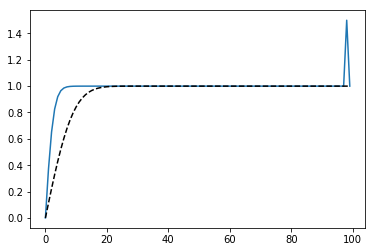

In [9]:
plot(T[5,:])
T50 = erf(sqrt(arange(nx)**2/(4*50*Fo))) # this is the analytical solution
plot(T50, 'k--')